# Cobalt Reporting Upsert
* Populate reporting tables for integrated Cobalt analytics dashboard

153


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:82: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  account['week'] = account['created'].dt.week


48569


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:140: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  accounts_for_stats['week'] = accounts_for_stats['created'].dt.week


17538
46479
500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
Assessment PHQ9 is already complete! Saving session info for further evaluation.
1000 accounts processed...
1500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
2000 accounts processed...
2500 accounts processed...
3000 accounts processed...
3500 accounts processed...
4000 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
4500 accounts processed...
5000 accounts processed...
5500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
Assessment GAD7 is already complete! Saving session info for further evaluation.
6000 accounts processed...
6500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
7000 accounts processed...
7500 accounts processed...
8000 accounts pro

25
856


All instances: 10977
	Unique accounts associated with all instances: 8109
Instances with complete PHQ4 2763
	Unique accounts associated with complete PHQ4 2618
Instances with escalation: 2545
	Unique accounts associated with instances with escalations: 2494
Total flow volume (patients): 2763
Total link wieght per level (patients): 2763
	Total links per level (unique assessment pathways): 173
13


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:1964: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
28


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2079: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
22


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2187: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
6


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2295: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2413: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



2545
29
121
29
121


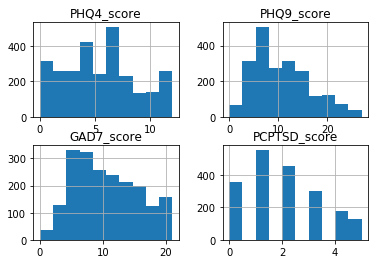

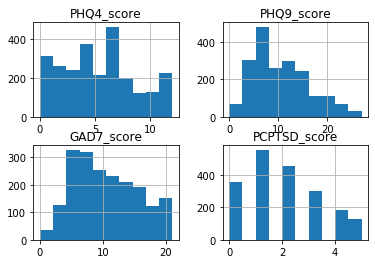

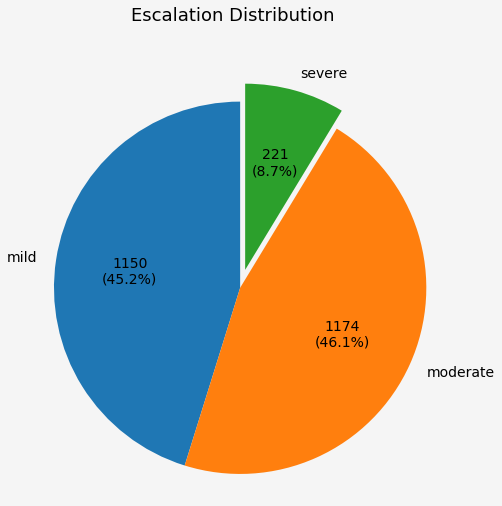

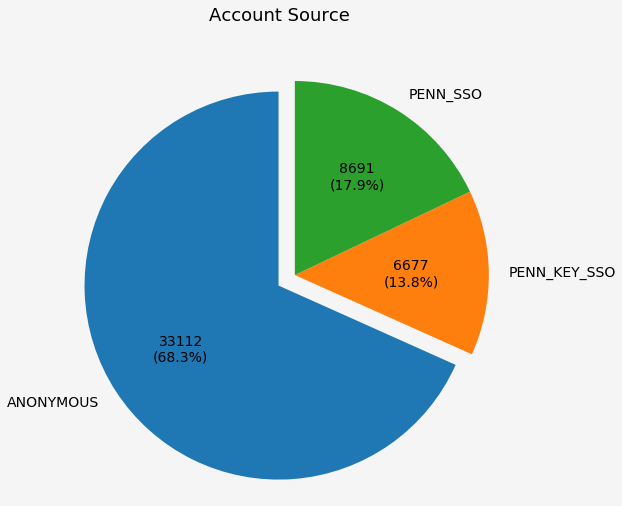

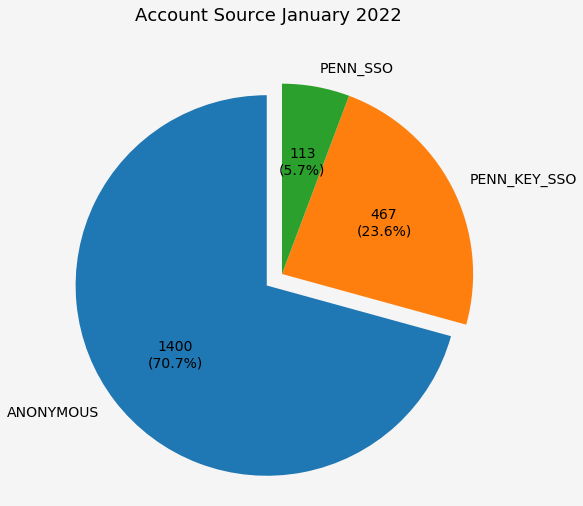

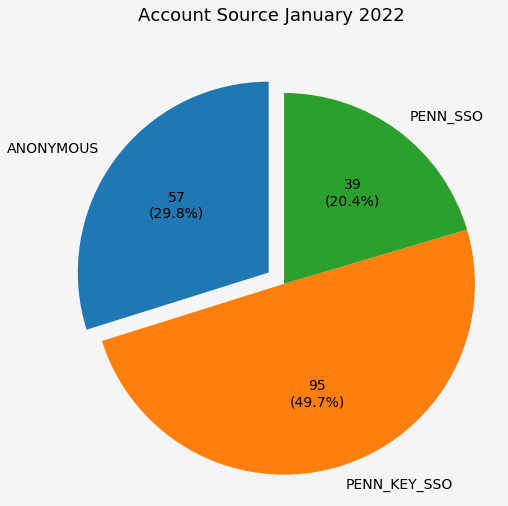

29
121
2545
100 

acct_esc_time_count    2545.0
acct_esc_time_pct         1.0
dtype: float64 

acct_esc_time_count    1985.00
acct_esc_time_pct         0.78
dtype: float64 

acct_esc_time_count    2063.0000
acct_esc_time_pct         0.8106
dtype: float64


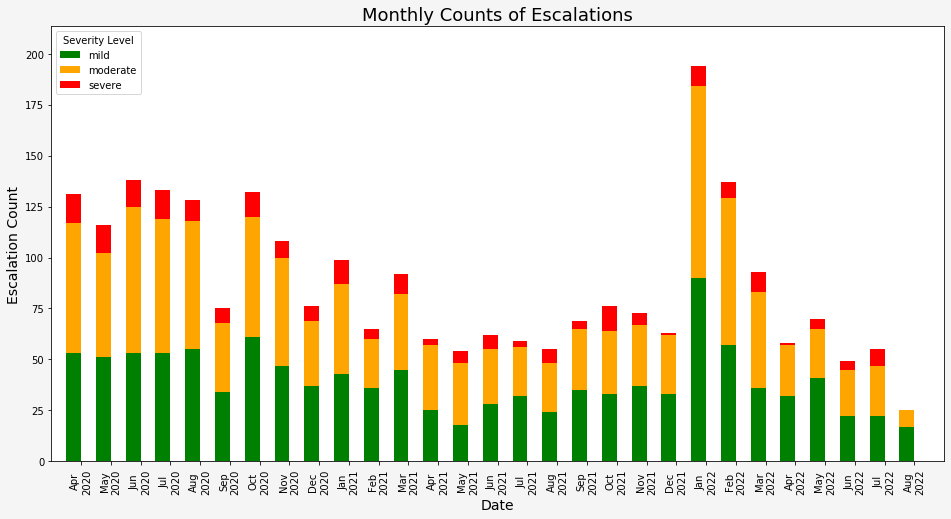

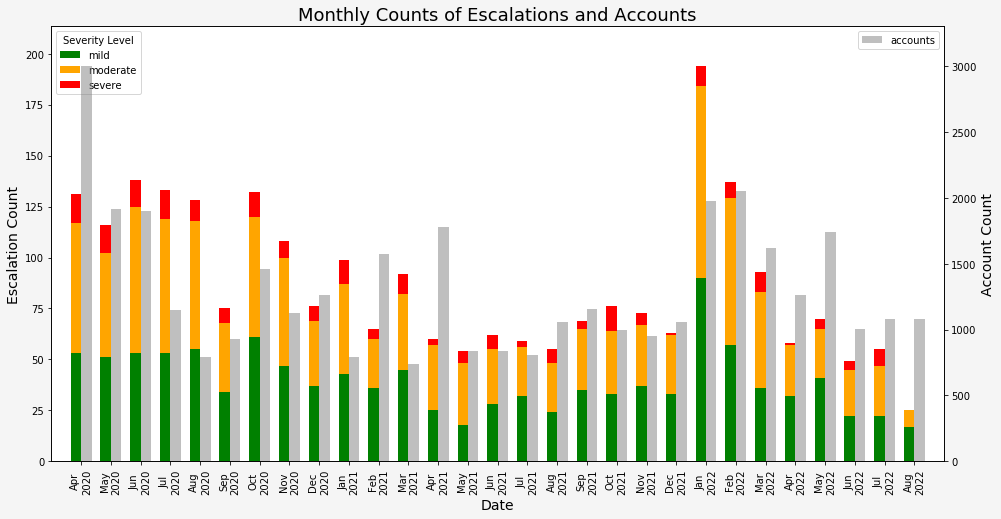

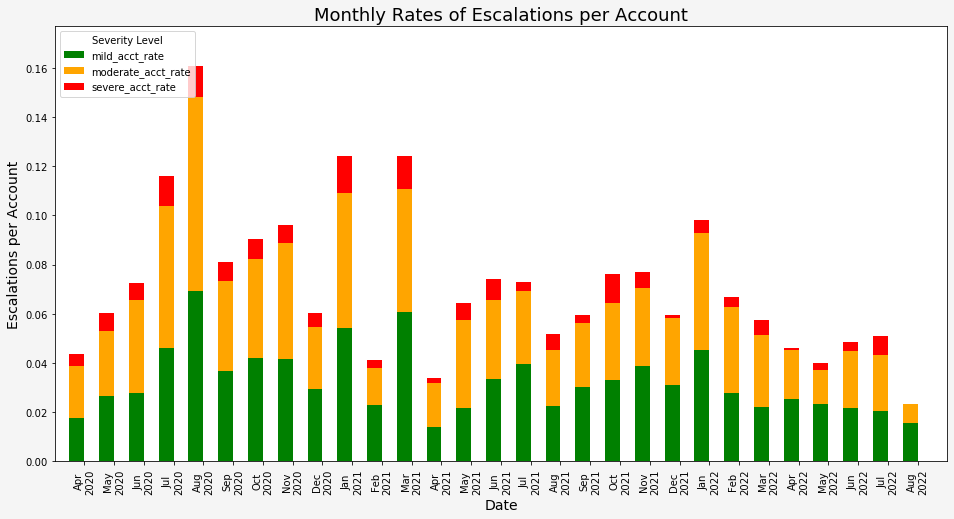

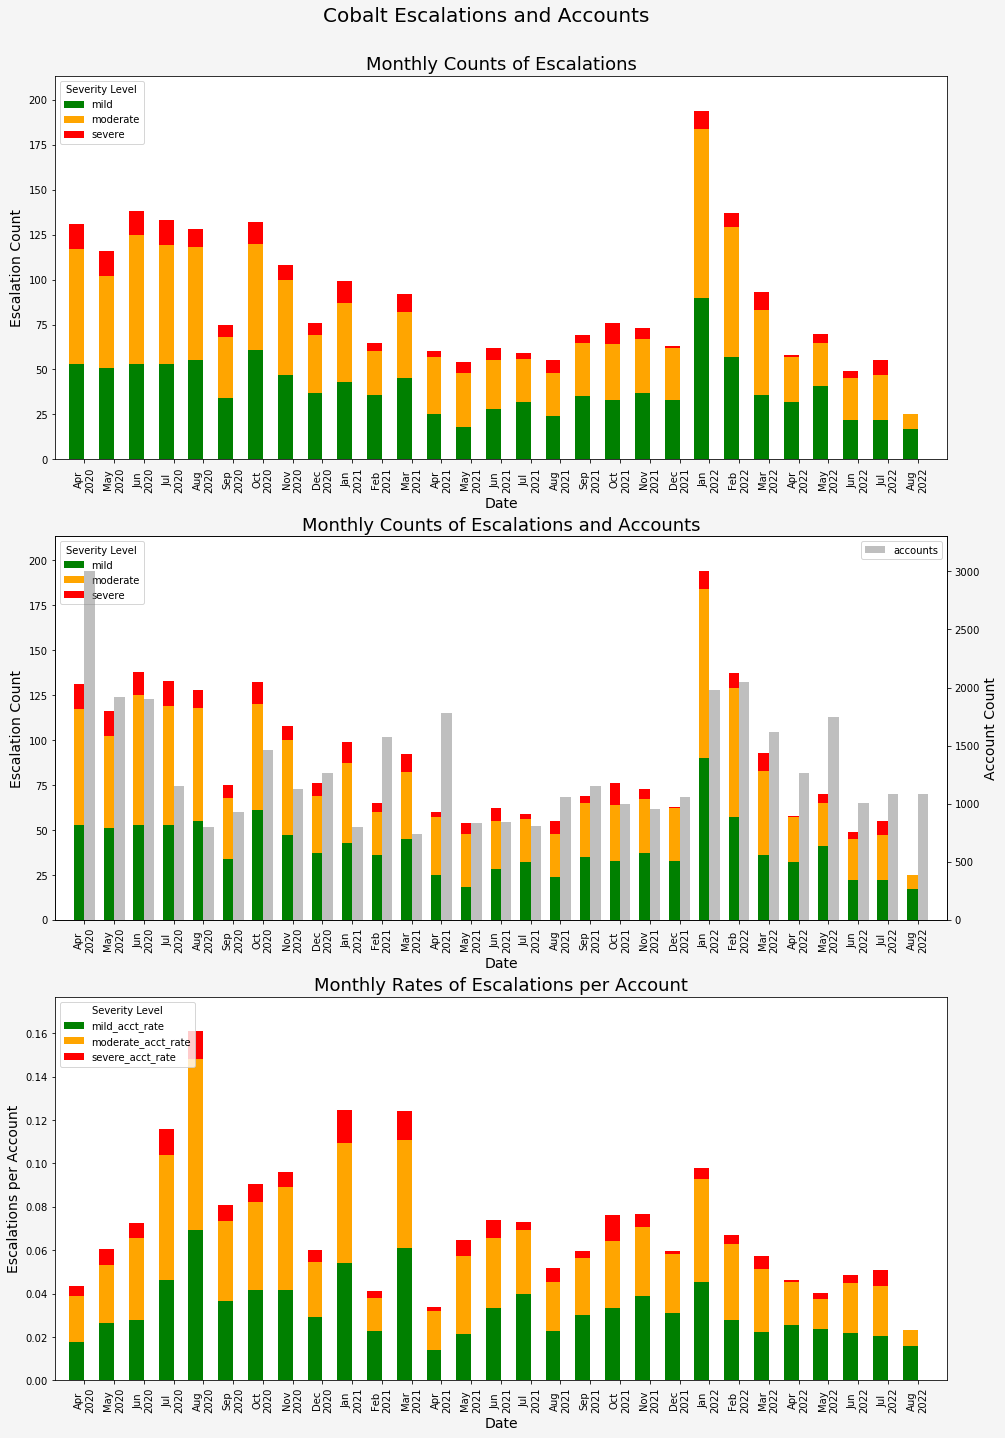

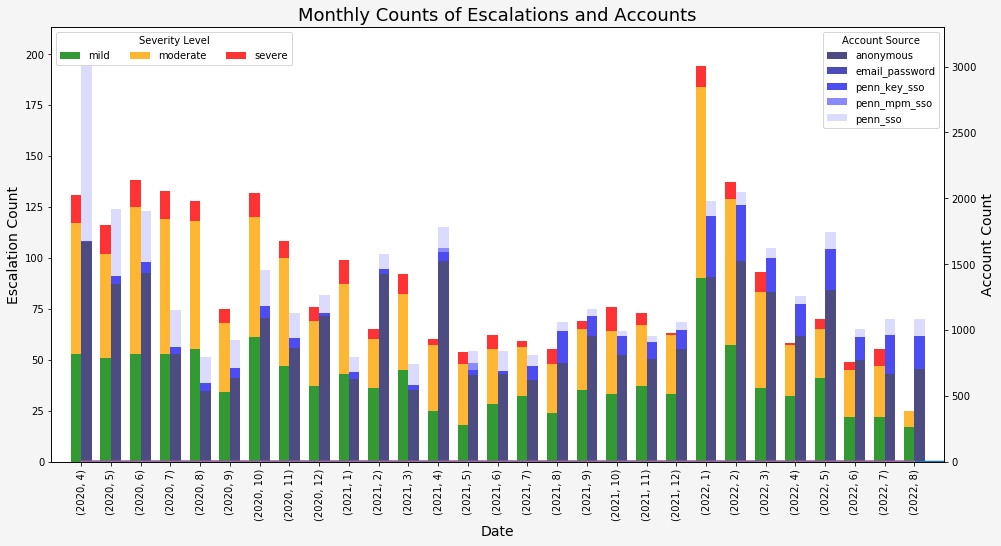

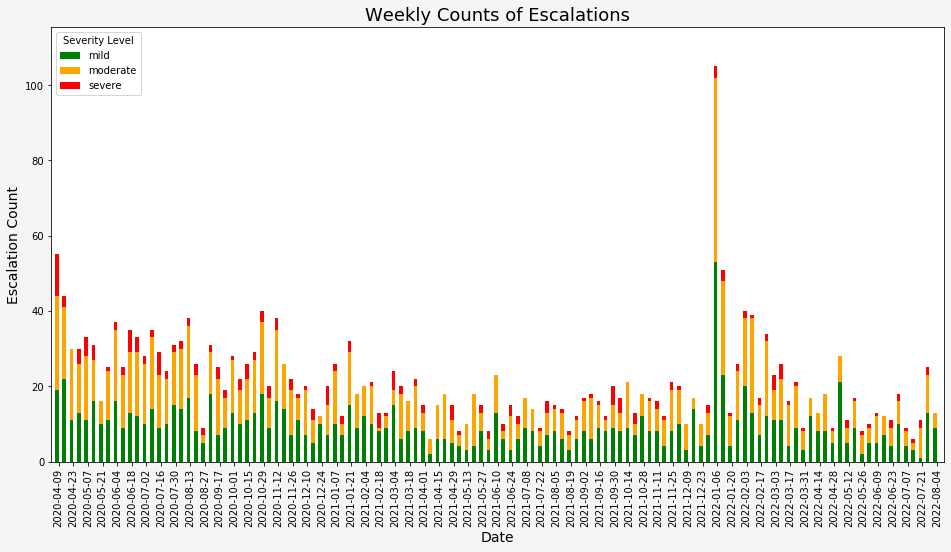

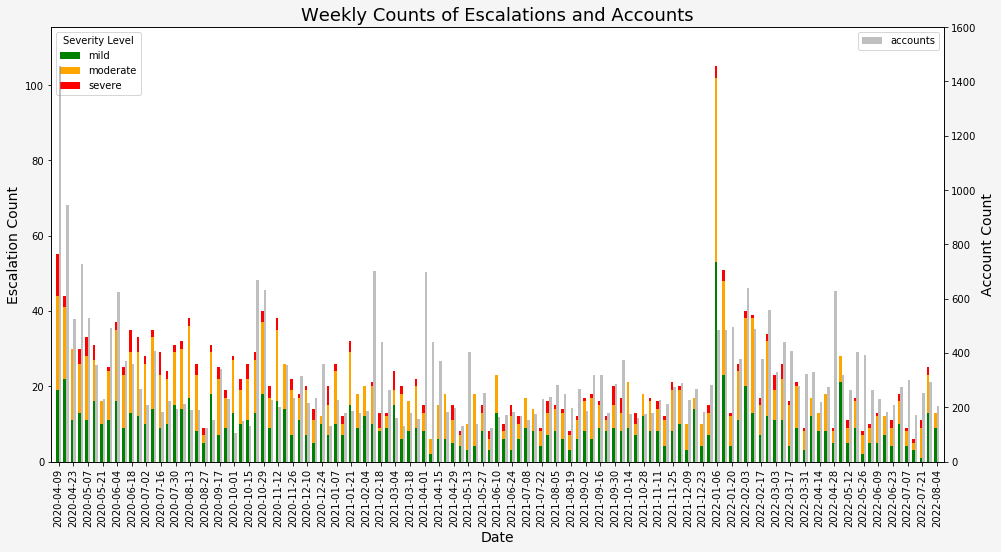

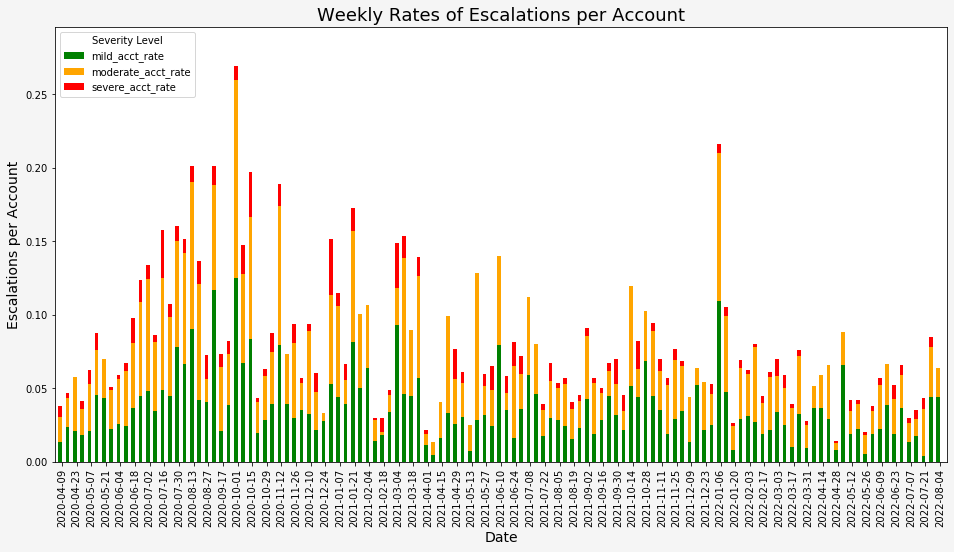

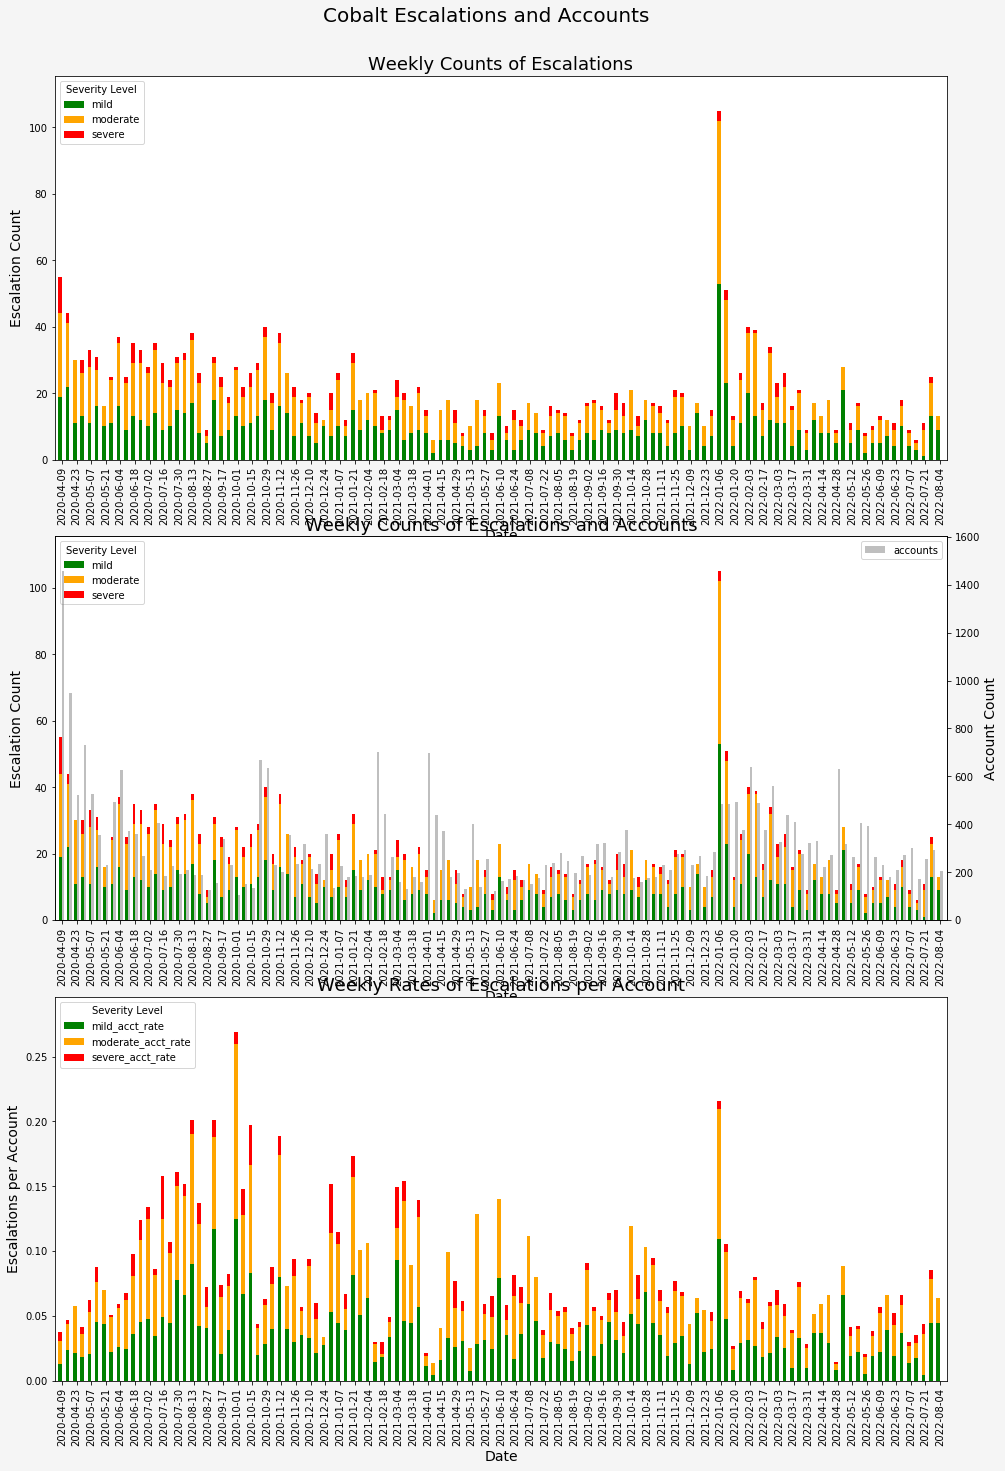

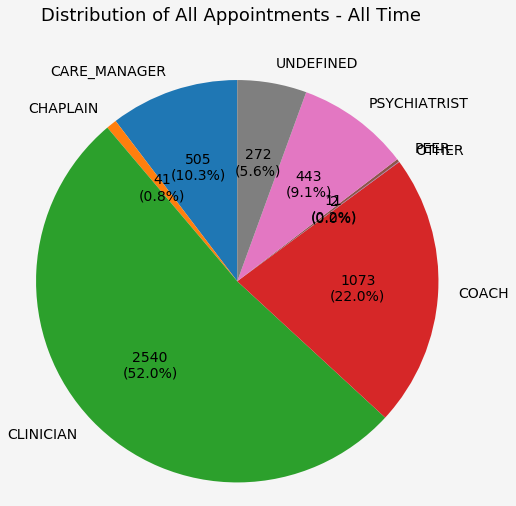

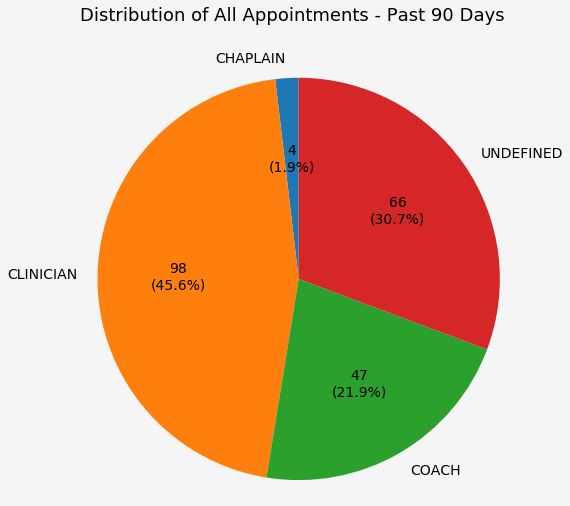

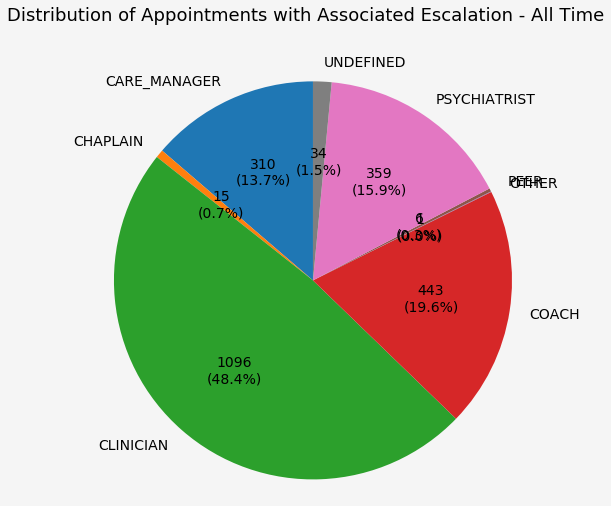

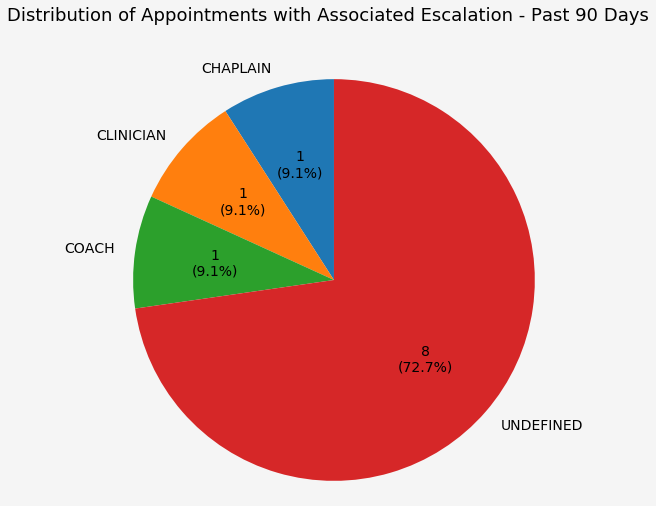

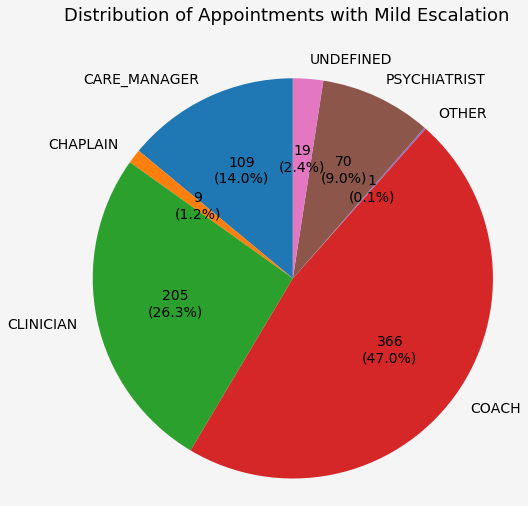

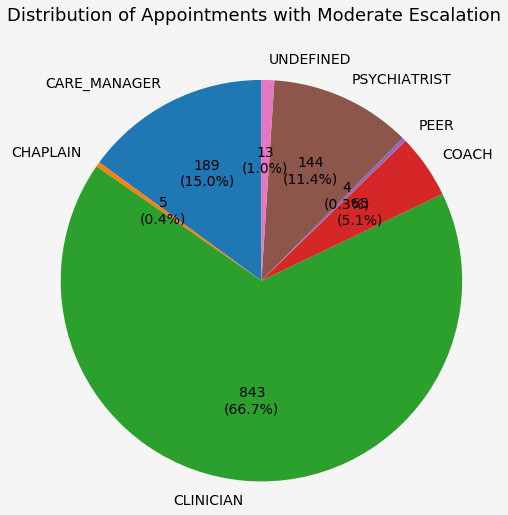

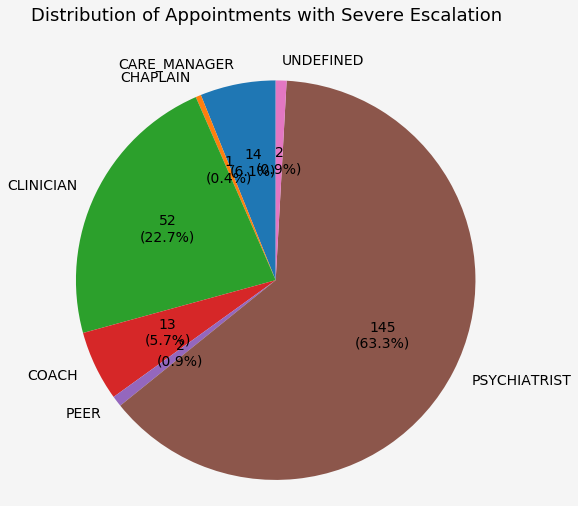

Active Accounts:
15095 unique, active accounts accessed mental health and well-being resources on the Cobalt platform
	8109 distinct accounts attempted assessments
	3255 distinct accounts booked 4887 appointments
	6598 distinct accounts engaged with content

Assessments and Escalations:
2494 unique accounts completed mental health assessments, resulting in 2545 distinct escalations
	Moderate Escalation:
	1156(46.35%) unique accounts met moderate criteria, resulting in 1174(46.13%) moderate escalations
	Severe Escalation:
	220(8.82%) unique accounts met severe criteria, resulting in 221(8.68%) severe escalations

Appointments:
1152/2494(46.19)% accounts with completed mental health assessments booked 2264 appointments with a trained mental health professional


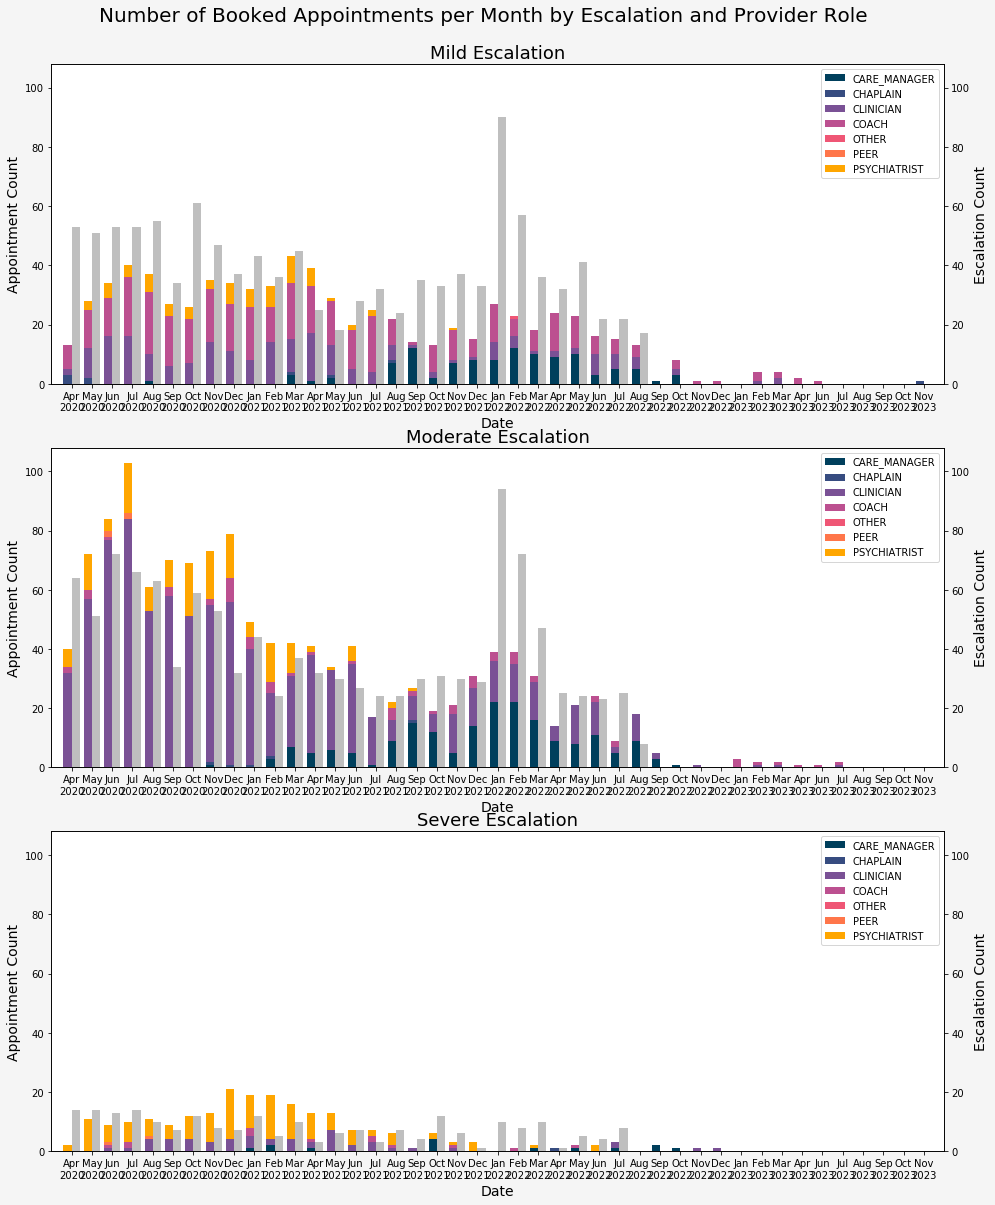

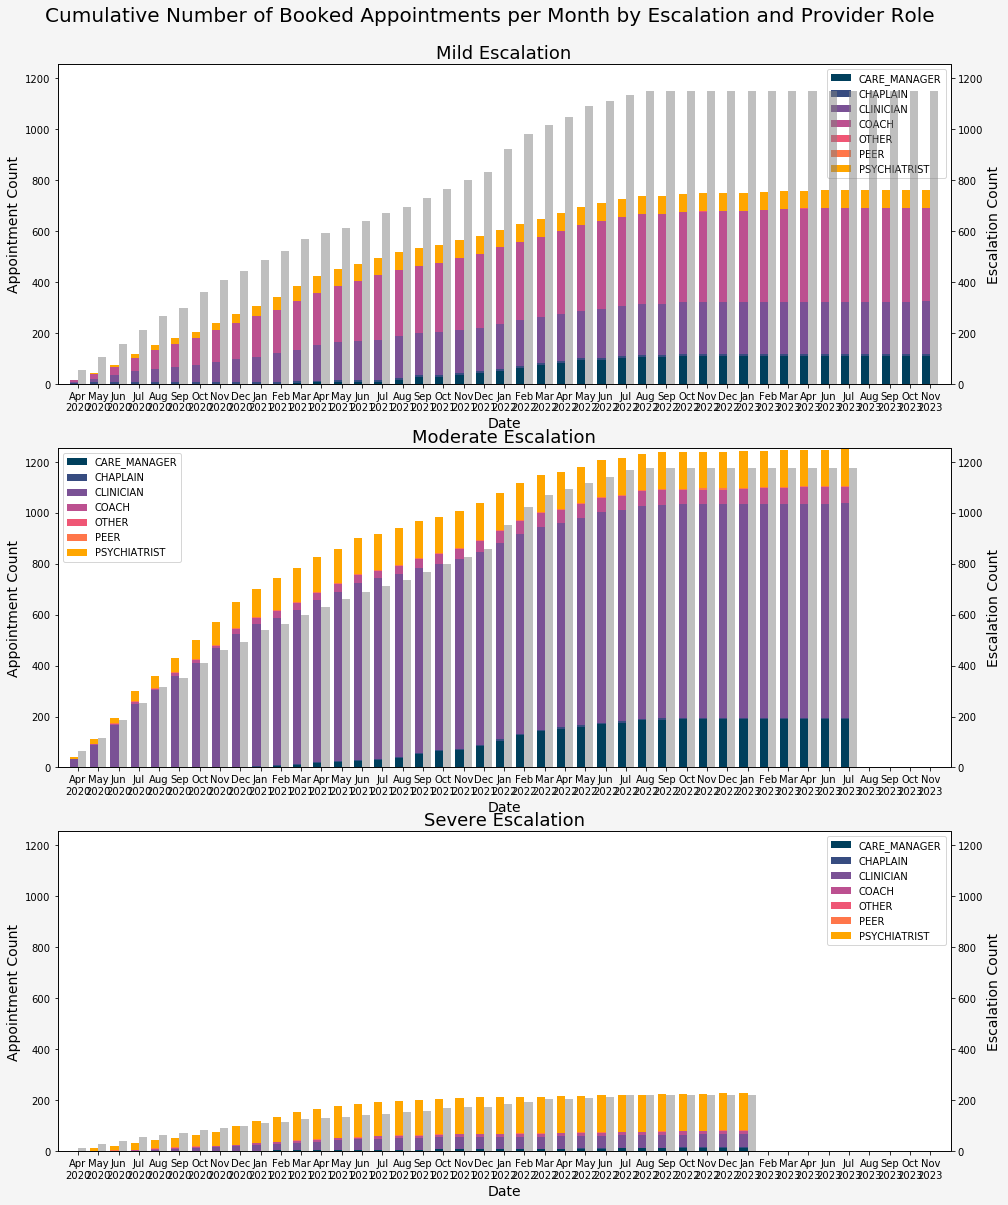

In [1]:
# Modules
from cobalt_reporting_functions import *
from cobalt_reporting_data import *

import pandas as pd
import numpy as np

import re
import datetime
from collections import defaultdict

import glob
import os
import psycopg2
from sqlalchemy import create_engine

# Pandas view options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('precision', 4)

# Dashboard and Reporting Data
* See unused/deprecated section for future sources/visualization categories

## Time Series

### Monthly

In [2]:
# Total counts: users, appointments (booked, completed, canceled, available), providers
use_cols = ['user_count','apt_count','apt_completed_count','apt_canceled_count','apt_avail_count','prov_count']

time_series_monthly = acct_monthly_ts_data.merge(apt_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_completed_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_canceled_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_avail_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(prov_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly.columns = use_cols

In [3]:
"""
#### TO DO ####
# User accounts by source
acct_src_ts_data.columns = ['user_count_'+col.lower() if 'user_count_' not in col else col for col in acct_src_ts_data.columns]
time_series_monthly = time_series_monthly.merge(acct_src_ts_data, how='outer', left_index=True, right_index=True)

# Booked appointments by provider role
aptRole_ts_data.columns = ['apt_count_'+col.lower() if 'apt_count_' not in col else col for col in aptRole_ts_data.columns]
time_series_monthly = time_series_monthly.merge(aptRole_ts_data, how='outer', left_index=True, right_index=True)

# Available appointments by provider role
aptRole_avail_ts_data.columns = ['apt_avail_count_'+col.lower() if 'apt_avail_count_' not in col else col for col in aptRole_avail_ts_data.columns]
time_series_monthly = time_series_monthly.merge(aptRole_avail_ts_data, how='outer', left_index=True, right_index=True)

# Assessment score statistics: PHQ9, GAD7, PHQ4, PCPTSD
time_series_monthly = time_series_monthly.merge(PHQ9_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(GAD7_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(PHQ4_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(PCPTSD_ts_data, how='outer', left_index=True, right_index=True)

"""

"\n#### TO DO ####\n# User accounts by source\nacct_src_ts_data.columns = ['user_count_'+col.lower() if 'user_count_' not in col else col for col in acct_src_ts_data.columns]\ntime_series_monthly = time_series_monthly.merge(acct_src_ts_data, how='outer', left_index=True, right_index=True)\n\n# Booked appointments by provider role\naptRole_ts_data.columns = ['apt_count_'+col.lower() if 'apt_count_' not in col else col for col in aptRole_ts_data.columns]\ntime_series_monthly = time_series_monthly.merge(aptRole_ts_data, how='outer', left_index=True, right_index=True)\n\n# Available appointments by provider role\naptRole_avail_ts_data.columns = ['apt_avail_count_'+col.lower() if 'apt_avail_count_' not in col else col for col in aptRole_avail_ts_data.columns]\ntime_series_monthly = time_series_monthly.merge(aptRole_avail_ts_data, how='outer', left_index=True, right_index=True)\n\n# Assessment score statistics: PHQ9, GAD7, PHQ4, PCPTSD\ntime_series_monthly = time_series_monthly.merge(PHQ9_ts

In [4]:
# Fill null values
time_series_monthly = time_series_monthly.fillna(0)

In [5]:
print(len(time_series_monthly))
print(len(time_series_monthly.columns))
time_series_monthly.head(2)

46
6


user_count  apt_count  apt_completed_count  apt_canceled_count  \
year month                                                                   
2020 4          3003.0       66.0                 53.0                13.0   
     5          1918.0      160.0                121.0                39.0   

            apt_avail_count  prov_count  
year month                               
2020 4                  0.0        63.0  
     5                 11.0       100.0

### Weekly

In [6]:
# Create time series dataset - can remove multiindex and add datetime index if needed
use_cols = ['user_count','apt_count','apt_completed_count','apt_canceled_count','apt_avail_count','prov_count']

time_series_weekly = acct_weekly_ts_data.merge(apt_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_weekly_completed_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_weekly_canceled_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_avail_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(prov_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly.columns = use_cols

In [7]:
"""
#### TO DO ####
# User accounts by source
acct_src_weekly_ts_data.columns = ['user_count_'+col.lower() if 'user_count_' not in col else col for col in acct_src_weekly_ts_data.columns]
time_series_weekly = time_series_weekly.merge(acct_src_weekly_ts_data, how='outer', left_index=True, right_index=True)

# Booked appointments by provider role
aptRole_weekly_ts_data.columns = ['apt_count_'+col.lower() if 'apt_count_' not in col else col for col in aptRole_weekly_ts_data.columns]
time_series_weekly = time_series_weekly.merge(aptRole_weekly_ts_data, how='outer', left_index=True, right_index=True)

# Available appointments by provider role
aptRole_avail_weekly_ts_data.columns = ['apt_avail_count_'+col.lower() if 'apt_avail_count_' not in col else col for col in aptRole_avail_weekly_ts_data.columns]
time_series_weekly = time_series_weekly.merge(aptRole_avail_weekly_ts_data, how='outer', left_index=True, right_index=True)

# Assessment score statistics: PHQ9, GAD7, PHQ4, PCPTSD
time_series_weekly = time_series_weekly.merge(PHQ9_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(GAD7_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(PHQ4_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(PCPTSD_weekly_ts_data, how='outer', left_index=True, right_index=True)

"""

"\n#### TO DO ####\n# User accounts by source\nacct_src_weekly_ts_data.columns = ['user_count_'+col.lower() if 'user_count_' not in col else col for col in acct_src_weekly_ts_data.columns]\ntime_series_weekly = time_series_weekly.merge(acct_src_weekly_ts_data, how='outer', left_index=True, right_index=True)\n\n# Booked appointments by provider role\naptRole_weekly_ts_data.columns = ['apt_count_'+col.lower() if 'apt_count_' not in col else col for col in aptRole_weekly_ts_data.columns]\ntime_series_weekly = time_series_weekly.merge(aptRole_weekly_ts_data, how='outer', left_index=True, right_index=True)\n\n# Available appointments by provider role\naptRole_avail_weekly_ts_data.columns = ['apt_avail_count_'+col.lower() if 'apt_avail_count_' not in col else col for col in aptRole_avail_weekly_ts_data.columns]\ntime_series_weekly = time_series_weekly.merge(aptRole_avail_weekly_ts_data, how='outer', left_index=True, right_index=True)\n\n# Assessment score statistics: PHQ9, GAD7, PHQ4, PCPTSD

In [8]:
# Set index names and fill null values
time_series_weekly.index.names = ['year','month','week']
time_series_weekly = time_series_weekly.fillna(0)

In [9]:
print(len(time_series_weekly))
print(len(time_series_weekly.columns))
time_series_weekly.head(2)

198
6


user_count  apt_count  apt_completed_count  \
year month week                                               
2020 4     9         1456.0        4.0                  3.0   
           16         946.0       24.0                 19.0   

                 apt_canceled_count  apt_avail_count  prov_count  
year month week                                                   
2020 4     9                    1.0              0.0        23.0  
           16                   5.0              0.0         0.0

# Database Upsert

## Time Series

### Monthly

In [10]:
records = ','.join([str(record) for record in time_series_monthly.to_records()])
col_items = list(time_series_monthly.index.names) + list(time_series_monthly.columns)
col_str = '(' + ','.join(col_items) + ')'
idx_str = '(' + ','.join(time_series_monthly.index.names) + ')'
update_str = ','.join([item + ' = EXCLUDED.' + item for item in col_items])
query = """INSERT INTO """ + DB_REPORTING_MONTHLY_NAME + """ AS t """ + col_str + \
        """ VALUES """ + records + \
        """ ON CONFLICT """ + idx_str + \
        """ DO UPDATE SET """ + update_str + """;"""
reporting_cursor.execute(query)

### Weekly

In [11]:
records = ','.join([str(record) for record in time_series_weekly.to_records()])
col_items = list(time_series_weekly.index.names) + list(time_series_weekly.columns)
col_str = '(' + ','.join(col_items) + ')'
idx_str = '(' + ','.join(time_series_weekly.index.names) + ')'
update_str = ','.join([item + ' = EXCLUDED.' + item for item in col_items])
query = """INSERT INTO """ + DB_REPORTING_WEEKLY_NAME + """ AS t """ + col_str + \
        """ VALUES """ + records + \
        """ ON CONFLICT """ + idx_str + \
        """ DO UPDATE SET """ + update_str + """;"""
reporting_cursor.execute(query)

# Unused / Dreprecated Code

In [12]:
"""

#### Data to be added to reportin tables ####

## Time series data: monthly and weekly aggregates - DONE ##
# Master data
acct_src_ts_data, acct_src_weekly_ts_data # Moved to cobalt_data.py
aptRole_ts_data, aptRole_weekly_ts_data # Moved to cobalt_data.py
aptRole_avail_ts_data, aptRole_avail_weekly_ts_data # Moved to cobalt_data.py
# Derived data
PHQ9_ts_data, PHQ9_weekly_ts_data # Moved to cobalt_data.py
GAD7_ts_data, GAD7_weekly_ts_data # Moved to cobalt_data.py
PHQ4_ts_data, PHQ4_weekly_ts_data # Moved to cobalt_data.py
PCPTSD_ts_data, PCPTSD_weekly_ts_data # Moved to cobalt_data.py


## Time series data: individual scores - IN PROGRESS ##
# Derived data
PHQ9_scores_dates,GAD7_scores_dates,PHQ4_scores_dates,PCPTSD_scores_dates


## Distribution/freq/hist data - IN PROGRESS ##
# Master data
apt_by_prov,apt_by_acct,apt_followup # these formats vary; create apt_followup dataset broken down by provider role
# Derived data
PHQ9_data,GAD7_data,PHQ4_data,PCPTSD_data # create score dist. data for last 90/30 days
PHQ9_q9_data # create for last 90/30 days


## List data - IN PROGRESS ##
# Derived data
popular_content,popular_content_past_90day,popular_content_past_30day

"""

'\n\n#### Data to be added to reportin tables ####\n\n## Time series data: monthly and weekly aggregates - DONE ##\n# Master data\nacct_src_ts_data, acct_src_weekly_ts_data # Moved to cobalt_data.py\naptRole_ts_data, aptRole_weekly_ts_data # Moved to cobalt_data.py\naptRole_avail_ts_data, aptRole_avail_weekly_ts_data # Moved to cobalt_data.py\n# Derived data\nPHQ9_ts_data, PHQ9_weekly_ts_data # Moved to cobalt_data.py\nGAD7_ts_data, GAD7_weekly_ts_data # Moved to cobalt_data.py\nPHQ4_ts_data, PHQ4_weekly_ts_data # Moved to cobalt_data.py\nPCPTSD_ts_data, PCPTSD_weekly_ts_data # Moved to cobalt_data.py\n\n\n## Time series data: individual scores - IN PROGRESS ##\n# Derived data\nPHQ9_scores_dates,GAD7_scores_dates,PHQ4_scores_dates,PCPTSD_scores_dates\n\n\n## Distribution/freq/hist data - IN PROGRESS ##\n# Master data\napt_by_prov,apt_by_acct,apt_followup # these formats vary; create apt_followup dataset broken down by provider role\n# Derived data\nPHQ9_data,GAD7_data,PHQ4_data,PCPTSD_

In [13]:
"""

#### Columns to be addded to reporting tables ####

new_cols_monthly = time_series_monthly.columns[6:]
monthly_table_str = 'ALTER TABLE reporting_monthly_rollup '
monthly_col_str = ','.join(['ADD COLUMN ' + col + ' INTEGER NOT NULL' for col in new_cols_monthly])
monthly_update_str = monthly_table_str + monthly_col_str + ';'
monthly_update_str

new_cols_weekly = time_series_weekly.columns[6:]
weekly_table_str = 'ALTER TABLE reporting_weekly_rollup '
weekly_col_str = ','.join(['ADD COLUMN ' + col + ' INTEGER NOT NULL' for col in new_cols_weekly])
weekly_update_str = weekly_table_str + weekly_col_str + ';'
weekly_update_str

"""

"\n\n#### Columns to be addded to reporting tables ####\n\nnew_cols_monthly = time_series_monthly.columns[6:]\nmonthly_table_str = 'ALTER TABLE reporting_monthly_rollup '\nmonthly_col_str = ','.join(['ADD COLUMN ' + col + ' INTEGER NOT NULL' for col in new_cols_monthly])\nmonthly_update_str = monthly_table_str + monthly_col_str + ';'\nmonthly_update_str\n\nnew_cols_weekly = time_series_weekly.columns[6:]\nweekly_table_str = 'ALTER TABLE reporting_weekly_rollup '\nweekly_col_str = ','.join(['ADD COLUMN ' + col + ' INTEGER NOT NULL' for col in new_cols_weekly])\nweekly_update_str = weekly_table_str + weekly_col_str + ';'\nweekly_update_str\n\n"